# Smart Optimization to Save Computing Time

In [ ]:
???

<table style="width:100%; height:90%">
      <tr>
    <th>Grid Search</th>
    <th>Smart Search</th>
  </tr>
  <tr>
    <td><img src="src/07_Table_Optimize BG Default Defaults.png" alt="Optimizing Limits' Parameters" style="width:100%"></td>
    <td><img src="src/08_Table_Smart Optimization.png" alt="Parametrize the Strategy" style="width:100%"></td>
  </tr>
</table>

## Load the model

In [2]:
import pickle

In [3]:
import pickle

with open('models/my_regression.pkl', 'rb') as f:
    model_dt = pickle.load(f)

model_dt

DecisionTreeRegressor(max_depth=15)

## Load the data

In [4]:
import pandas as pd
df = pd.read_excel('data/microsoft-linkedin-processed.xlsx' , index_col=0)
df.index = pd.to_datetime(df.index)

## Parametrize & optimize the investment strategy

### Create Strategy class

In [5]:
from backtesting import Strategy, Backtest

In [6]:
class SimpleRegression(Strategy):
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Create `Backtest` class

In [7]:
from backtesting import Backtest

In [8]:
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [13]:
bt = Backtest(df_explanatory, SimpleRegression,
              cash=10000, commission=.002, exclusive_orders=True)

# bt = Backtest(df_explanatory, SimpleRegression, cash=10000,  commission=.002, exclusive_orders=True)

In [14]:
results = bt.run()
results["Return [%]"]

665.2305757685085

### Optimize backtesting with multiple combinations

In [9]:
import multiprocessing as mp
mp.set_start_method('fork')

In [10]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy=[0,7],
    limit_sell=[-7,0],
    maximize='Return [%]',
    method='skopt',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True
    )

/home/remco/Documents/python-training/venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, -4] before, using random point [0, -4]
  warnings.warn(
/home/remco/Documents/python-training/venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0, -4] before, using random point [0, -7]
  warnings.warn(
/home/remco/Documents/python-training/venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0, -4] before, using random point [4, -7]
  warnings.warn(
/home/remco/Documents/python-training/venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0, -4] before, using random point [5, -7]
  warnings.warn(
/home/remco/Documents/python-training/venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: Th

In [11]:
dff = heatmap.reset_index()
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')


In [12]:
import numpy as np

In [13]:
dff.sort_index(axis=1, ascending=False) \
  .style.format(precision=0) \
  .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff)) \
  .highlight_null(props='background:transparent; color:transparent')




limit_sell,0,-1,-2,-3,-4,-5,-6,-7
limit_buy,,,,,,,,
0,21998,15408,7552,3627,1993,nan,742,632
1,340,1277,1537,969,1240,665,758,nan
2,-29,50,656,698,1766,nan,747,684
3,nan,-75,-3,22,109,nan,108,223
4,-81,nan,nan,-1,147,nan,100,211
5,-84,-87,nan,-31,nan,96,58,119
6,-100,nan,-100,-100,54,88,58,119
7,-100,nan,-100,-100,nan,-100,-100,-100


### Which are the best values for the parameters?

### How to interpret smart optimization?

#### Number of evaluations

https://kernc.github.io/backtesting.py/doc/examples/Parameter%20Heatmap%20&%20Optimization.html

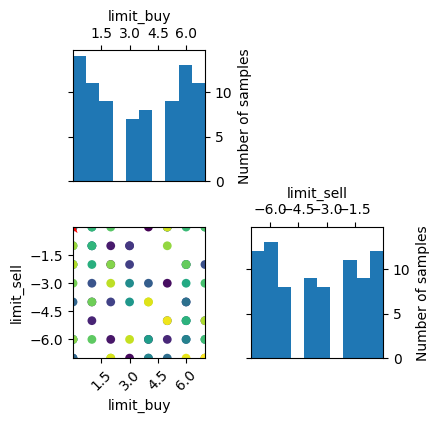

In [14]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

#### Density

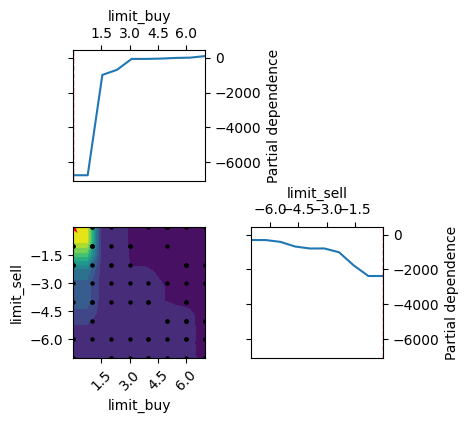

In [15]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="08C_Smart Optimization to Save Computing Time.ipynb">notebook</a>.